In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load dataset

In [8]:
df=pd.read_csv('/content/drive/MyDrive/praktikum/praktikum13/data/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Cek Missing Value

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df = df.drop(columns=['Cabin', 'Name', 'Ticket'], axis=1)

<Axes: >

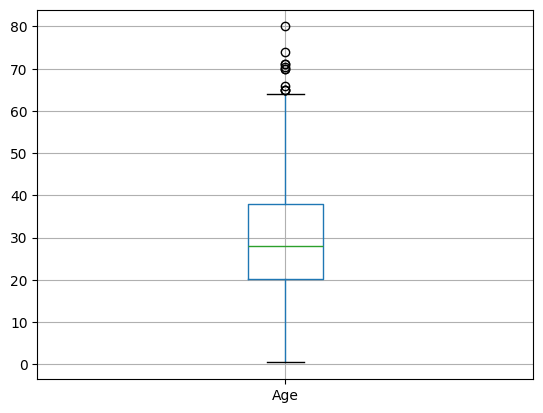

In [11]:
#Visualisasi Distribusi dan Outlier pada kolom age
df.boxplot(column='Age')


In [12]:
#Megisi nilai kosong pada kolom Age dengan Median
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-674135354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [13]:
#Mengisi Nilai kosong pad kolom Embarked dengan Modus
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3287793359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [14]:
#Verifikasi ulang missing value
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [15]:
replacements = {
    'Sex' : {'male':0, 'female': 1},
    'Embarked': {'S':0, 'C':1, 'Q':2}
}

df.replace(replacements, inplace=True)



/tmp/ipython-input-1892847642.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacements, inplace=True)


In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


#Split Data dan Transformasi (Scaling)

In [17]:
#Split Data Variable X dan Y
X = df.drop('Survived', axis=1)
y = df ['Survived']

#Transform Data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


#Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#Modeling - menurut struktur unput untuk neural network

In [18]:
X_train.shape

(712, 8)

In [19]:
X_train.shape[1]

8

#Pembuatan model neural network (Arsitektur ANN)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()

# Hidden layer 1
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# Dropout untuk mengurangi overfitting
model.add(Dropout(0.3))

# Hidden layer 2
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Kompilasi mode dan ringkasan arsitektur (model summary)

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

#Early Stopping ( Pencegahan Overfitting Selama Training)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
monitor='val_loss',
patience=5,
restore_best_weights=True

)


#Training Model Neural Network

In [23]:
history = model.fit(
X_train,
y_train,
epochs=100,
batch_size=16,
validation_split=0.2,
callbacks=[early_stop],
verbose=1
)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5343 - loss: 0.7644 - val_accuracy: 0.7483 - val_loss: 0.6359
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6514 - loss: 0.7123 - val_accuracy: 0.8252 - val_loss: 0.6018
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7076 - loss: 0.6452 - val_accuracy: 0.8252 - val_loss: 0.5731
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6443 - loss: 0.6351 - val_accuracy: 0.7832 - val_loss: 0.5540
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7327 - loss: 0.5791 - val_accuracy: 0.8182 - val_loss: 0.5304
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7193 - loss: 0.5743 - val_accuracy: 0.8252 - val_loss: 0.5118
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7359 - loss: 0.5693 - val_accuracy: 0.8042 - val_loss: 0.4975
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7380 - loss: 0.5579 - val_accuracy: 0.8182 - 

#Evaluasi Model (testing data)

In [24]:
loss,accuracy = model.evaluate(X_test, y_test)

print("Test Loss :", loss)
print("Test Accuracy :", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8356 - loss: 0.3874
Test Loss : 0.4025425314903259
Test Accuracy : 0.8156424760818481


#Visualisasi hasil pelatihan (accuracy dan Loss)

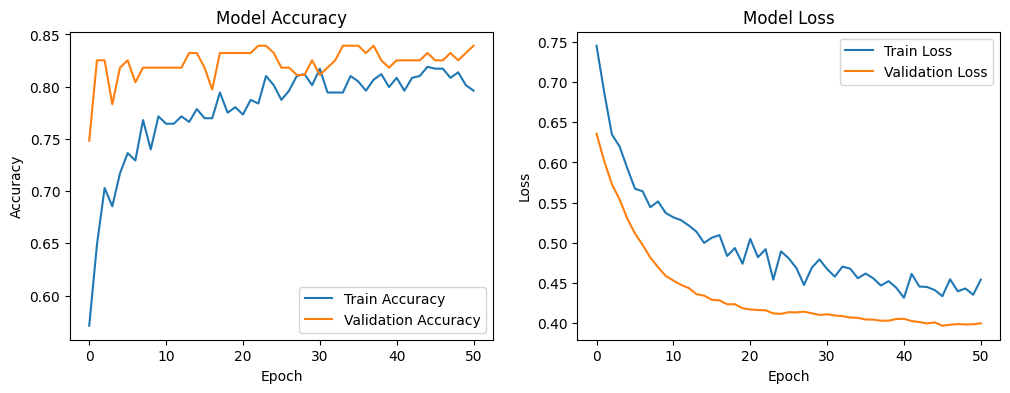

In [26]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy' ], label='Train Accuracy' )
plt.plot(history.history['val_accuracy'], label='Validation Accuracy' )
plt.title('Model Accuracy' )
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss' )
plt.plot(history.history['val_loss'], label='Validation Loss' )
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss' )
plt.legend()

plt. show()